In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


import gc

In [2]:
# Read and View the data

In [3]:
df = pd.read_csv('/home/miguel/Apps/Data_Science_Python_GIT/10_Teste2_DeeperSystems/train.csv')

In [4]:
# Check data
df.head(5)

,fn,label
0,0-10049200_1891-09-16_1958.jpg,rotated_left
1,0-10110600_1985-09-17_2012.jpg,rotated_left
2,0-10126400_1964-07-07_2010.jpg,upright
3,0-1013900_1917-10-15_1960.jpg,rotated_right
4,0-10166400_1960-03-12_2008.jpg,upside_down


In [5]:
# Check data
df.tail(5)

,fn,label
48891,89-9693789_1941-01-11_1973.jpg,upright
48892,89-9719989_1985-04-13_2004.jpg,rotated_left
48893,89-981289_1962-12-23_2009.jpg,rotated_left
48894,89-9921189_1983-11-25_2013.jpg,rotated_left
48895,89-9954489_1927-03-13_1977.jpg,rotated_right


In [6]:
len(df)
# 48mil imagens pra treino

48896

In [7]:
# View some images

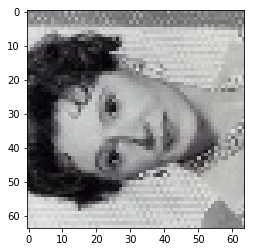

(64, 64, 3)


In [8]:
for img in df['fn'][0:1]:
    img = mpimg.imread('/home/miguel/Apps/Data_Science_Python_GIT/10_Teste2_DeeperSystems/train/'+img)
    imgplot = plt.imshow(img)
    plt.show()
    print(img.shape)

In [11]:
class_ = df['label'].unique()
class_,len(class_)

(array(['rotated_left', 'upright', 'rotated_right', 'upside_down'],
       dtype=object), 4)

In [12]:
# Factorize, ao invez de criar uma função
# para substituir os nomes por índices
# use FACTORIZE

# FONTE https://stackoverflow.com/questions/42320834/sklearn-changing-string-class-label-to-int

pd.factorize(df['label'])

(array([0, 0, 1, ..., 0, 0, 2]),
 Index(['rotated_left', 'upright', 'rotated_right', 'upside_down'], dtype='object'))

In [13]:
# Veja como funciona
df['number'] = pd.factorize(df['label'])[0]

In [16]:
df.head(7)
# Rotated_lef ->0
# Roated_right -> 2
# upright -> 1
# upside_down ->3

,fn,label,number
0,0-10049200_1891-09-16_1958.jpg,rotated_left,0
1,0-10110600_1985-09-17_2012.jpg,rotated_left,0
2,0-10126400_1964-07-07_2010.jpg,upright,1
3,0-1013900_1917-10-15_1960.jpg,rotated_right,2
4,0-10166400_1960-03-12_2008.jpg,upside_down,3
5,0-102100_1970-10-09_2008.jpg,rotated_left,0
6,0-1024100_1982-06-07_2011.jpg,rotated_left,0


In [17]:
# To see this:
for label,number in zip(df['label'].unique(),df['number'].unique()):
    print(label,'-->',number)

rotated_left --> 0
upright --> 1
rotated_right --> 2
upside_down --> 3


In [18]:
def process_img(img):
    x = []
    for image in img:
        x.append(mpimg.imread('/home/miguel/Apps/Data_Science_Python_GIT/10_Teste2_DeeperSystems/train/'+image))
    return x
                 

In [42]:
x = process_img(df['fn'][0:1000])
y = df['number'][0:1000]

x = np.array(x)
y = np.array(y)

NameError: name 'df' is not defined

In [ ]:
x.shape 
# (img_number,rows,coloumns,layers)

In [ ]:
y.shape
# Value 1,2,3,4 of the img orientation

In [ ]:
## Separating datas with Sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.20,#20% reserved to test
    random_state =2
)

In [ ]:
del x
del y
del df
gc.collect()

In [ ]:
x_train.shape,y_train.shape

In [ ]:
# 1 imagem 
x_train[0].shape
# vou usar no INPUT_SHAPE

## Starting Training

In [ ]:
from keras import(
    layers, # Convolutional Layer
    models, # Sequential
    optimizers # Adams
)

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def create_model():

    model = models.Sequential()
    model.add(layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        activation="relu",
        input_shape = (x_train[0].shape)
    ))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten()) #Convert matrix to array (input data)
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation = 'relu'))
    model.add(layers.Dense(4, activation = 'softmax'))# we will use 'softmax' because 4 position possibilities
    
    return model


In [ ]:
model = create_model()
model.summary()

In [ ]:
#parameters to the model
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = "Adam",
    metrics = ['accuracy']
)

In [ ]:
#Length
ntrain = len(x_train)
ntest = len(x_test)

#2^n...2..4..8..16..32..64..
batch_size =128

ntrain,ntest

In [ ]:
def gerador(X_train,X_test,y_train,y_test):
    # Normalizate the image [between 0 and 255] to [between 0 and 1]
    train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 0,
        width_shift_range = 0.2,
        height_shift_range= 0.2,
        shear_range= 0.2,
        zoom_range= 0.2,
        horizontal_flip=True,
    )

    test_datagen = ImageDataGenerator(rescale = 1./255) #Rescale
    
    # Create the image generators
    train_generator = train_datagen.flow(x_train,y_train,batch_size = batch_size)
    val_generator = test_datagen.flow(x_test,y_test,batch_size = batch_size)
    
    return train_generator, val_generator


train_generator,test_generator = gerador(x_train,x_test,y_train,y_test)

In [43]:
def train(epoch):
    history = model.fit_generator(
    train_generator,
    steps_per_epoch = ntrain // batch_size,
    epochs = epoch,
    validation_data = test_generator,
    validation_steps = ntest // batch_size
    )
    
    return history

In [44]:
history = train(40)

Epoch 1/40
3/3 [==============================] - 2s 708ms/step - loss: 1.3517 - accuracy: 0.3568 - val_loss: 1.3264 - val_accuracy: 0.3900
Epoch 2/40
3/3 [==============================] - 2s 565ms/step - loss: 1.3204 - accuracy: 0.3787 - val_loss: 1.3245 - val_accuracy: 0.3400
Epoch 3/40
3/3 [==============================] - 2s 549ms/step - loss: 1.3760 - accuracy: 0.3346 - val_loss: 1.3185 - val_accuracy: 0.3800
Epoch 4/40
3/3 [==============================] - 1s 471ms/step - loss: 1.3812 - accuracy: 0.3419 - val_loss: 1.3255 - val_accuracy: 0.3500
Epoch 5/40
3/3 [==============================] - 1s 480ms/step - loss: 1.3550 - accuracy: 0.3640 - val_loss: 1.3325 - val_accuracy: 0.3500
Epoch 6/40
3/3 [==============================] - 2s 680ms/step - loss: 1.3630 - accuracy: 0.3359 - val_loss: 1.3369 - val_accuracy: 0.3300
Epoch 7/40
3/3 [==============================] - 2s 623ms/step - loss: 1.3118 - accuracy: 0.3971 - val_loss: 1.3356 - val_accuracy: 0.3500
Epoch 8/40
3/3 [====

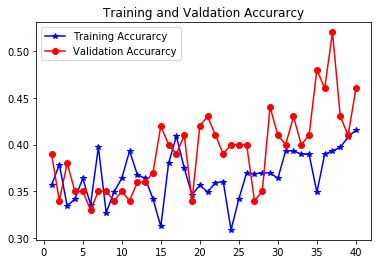

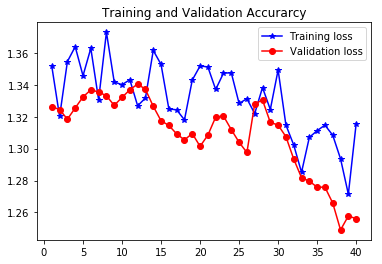

In [45]:
def plotar():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1,len(acc)+1)

    plt.plot(epochs,acc,'*-b',label = 'Training Accurarcy')
    plt.plot(epochs,val_acc,'o-r',label = 'Validation Accurarcy')
    plt.title('Training and Valdation Accurarcy')
    plt.legend()

    plt.figure()
    plt.plot(epochs,loss,'*-b',label = 'Training loss')
    plt.plot(epochs,val_loss,'o-r',label = 'Validation loss')
    plt.title('Training and Validation Accurarcy')
    plt.legend()

    plt.show()
    
plotar()